# VAE - Variational Auto Encoder
### Variational auto encoder Encoder maps X onto a latent space Z Decoder samples Z from N(0,1) VAE_loss = Reconstruction_loss + KL_loss
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.vae

### Arguments that work with VAE algorithm:
1. encoder_neurons
2. oder_neurons
3. ent_dim
4. den_activation
5. output_activation
6. loss
7. optimizer
8. epochs
9. batch_size
10. dropout_rate
11. l2_regularizer
12. validation_size
13. preprocessing
14. verbose
15. random_state
16. contamination
17. gamma
18. capacity

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=6, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   235.811553 seconds
image downsampling       ...took     3.484240 seconds
image downsampling       ...took     5.857705 seconds
image downsampling       ...took     8.261112 seconds
image downsampling       ...took    10.657335 seconds
image downsampling       ...took    13.017250 seconds
image downsampling       ...took    15.396358 seconds
image downsampling       ...took    17.794177 seconds
image downsampling       ...took    23.171390 seconds
image downsampling       ...took    28.512829 seconds
image downsampling       ...took    33.921561 seconds
image downsampling       ...took    48.240539 seconds
image downsampling       ...took    53.630748 seconds
image downsampling       ...took    60.776095 seconds
image downsampling       ...took    63.140023 seconds
image downsampling       ...took    68.545338 seconds
image downsampling       ...took    70.928574 seconds
image downsampling       ...took    73.305296 seconds
image downsampling       ...

2022-08-31 19:07:47.528777: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-08-31 19:07:53.223443: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-08-31 19:07:53.532600: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-08-31 19:07:53.532664: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-08-31 19:07:53.599195: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-08-31 19:07:53.599267: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.1

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 4096)         16781312    input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          524416      dense[0][0]                      
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128)          0           dense_1[0][0]                    
______________________________________________________________________________________________

2022-08-31 19:07:53.662197: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-31 19:07:53.664929: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-08-31 19:07:53.670064: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2022-08-31 19:07:53.677501: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-08-31 19:07:55.808051: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecuto

Epoch 1/100


2022-08-31 19:08:02.831408: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


1/3 [=========>....................] - ETA: 14s - loss: 5360.5352

2022-08-31 19:08:06.157521: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-08-31 19:08:06.158123: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


3/3 [==============================] - 8s 434ms/step - loss: 8623.3047 - val_loss: 5727.2583
Epoch 2/100
3/3 [==============================] - 0s 52ms/step - loss: 183415.6250 - val_loss: 5784.4243
Epoch 3/100
3/3 [==============================] - 0s 51ms/step - loss: 18405.4180 - val_loss: 6030.0283
Epoch 4/100
3/3 [==============================] - 0s 52ms/step - loss: 45342478336.0000 - val_loss: 6066.1289
Epoch 5/100
3/3 [==============================] - 0s 44ms/step - loss: 6827.4419 - val_loss: 6011.7197
Epoch 6/100
3/3 [==============================] - 0s 46ms/step - loss: 753802.4375 - val_loss: 6019.7637
Epoch 7/100
3/3 [==============================] - 0s 44ms/step - loss: 441252.0938 - val_loss: 5990.2725
Epoch 8/100
3/3 [==============================] - 0s 49ms/step - loss: 973363.4375 - val_loss: 5906.4062
Epoch 9/100
3/3 [==============================] - 0s 50ms/step - loss: 7105.4858 - val_loss: 5814.0771
Epoch 10/100
3/3 [==============================] - 0s 45ms

3/3 [==============================] - 0s 43ms/step - loss: 4124.3188 - val_loss: 4020.9517
Epoch 80/100
3/3 [==============================] - 0s 45ms/step - loss: 4085.4670 - val_loss: 3996.6230
Epoch 81/100
3/3 [==============================] - 0s 42ms/step - loss: 4099.8364 - val_loss: 4015.1943
Epoch 82/100
3/3 [==============================] - 0s 50ms/step - loss: 4080.3972 - val_loss: 3998.8943
Epoch 83/100
3/3 [==============================] - 0s 44ms/step - loss: 4107.7925 - val_loss: 4020.8496
Epoch 84/100
3/3 [==============================] - 0s 44ms/step - loss: 4108.2627 - val_loss: 3998.2949
Epoch 85/100
3/3 [==============================] - 0s 44ms/step - loss: 4094.5808 - val_loss: 4013.9309
Epoch 86/100
3/3 [==============================] - 0s 44ms/step - loss: 4108.7500 - val_loss: 4005.2810
Epoch 87/100
3/3 [==============================] - 0s 41ms/step - loss: 4129.6587 - val_loss: 4017.0286
Epoch 88/100
3/3 [==============================] - 0s 46ms/step - l

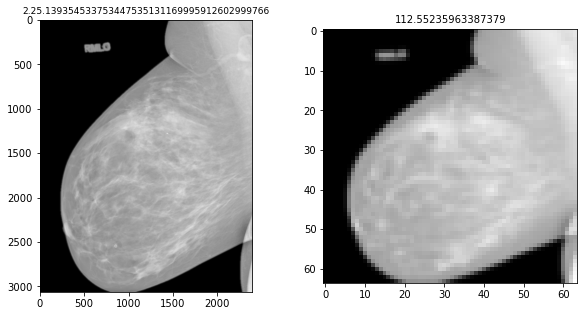

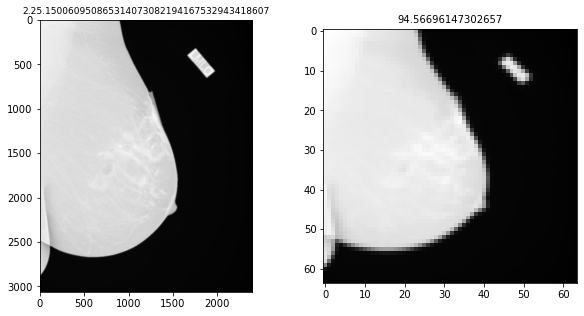

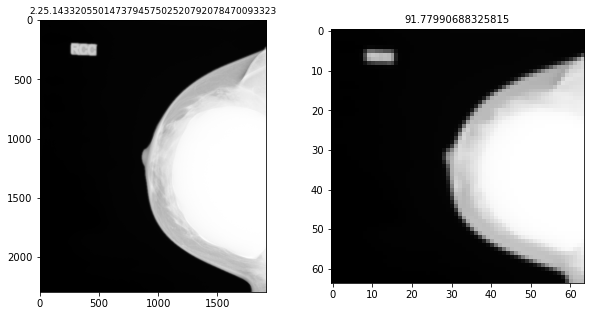

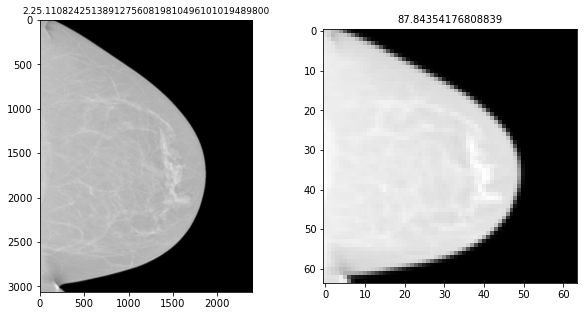

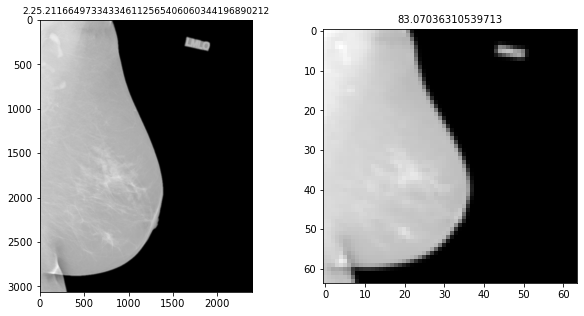

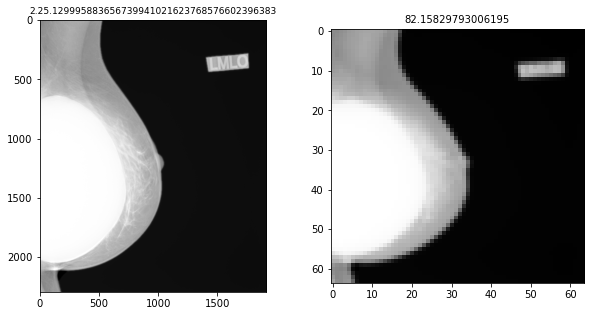

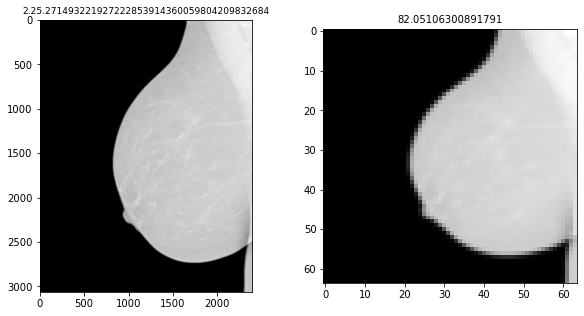

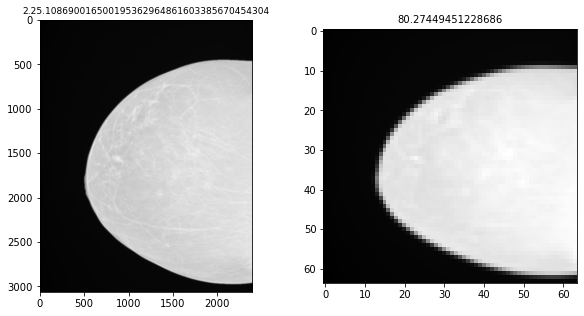

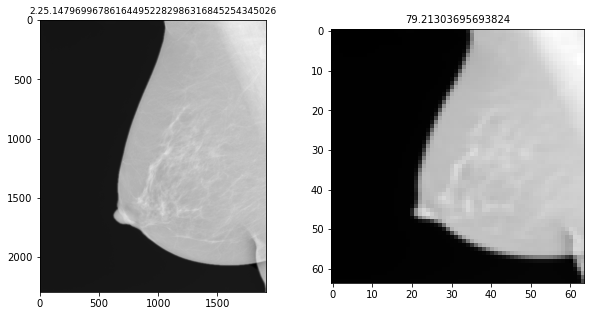

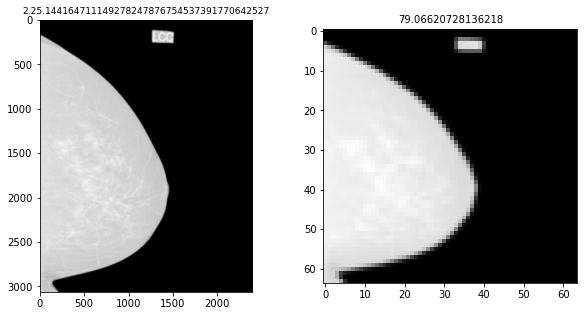

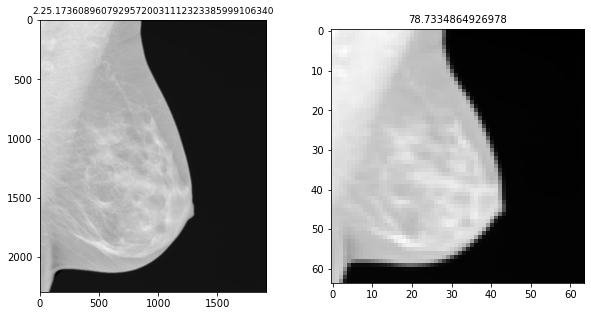

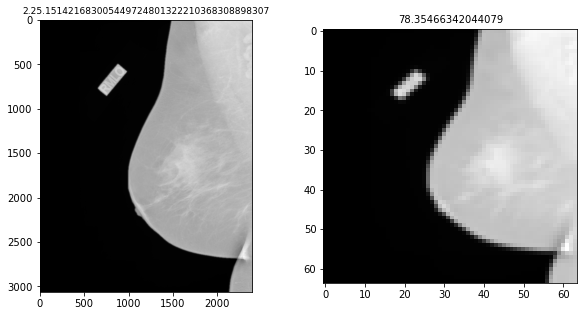

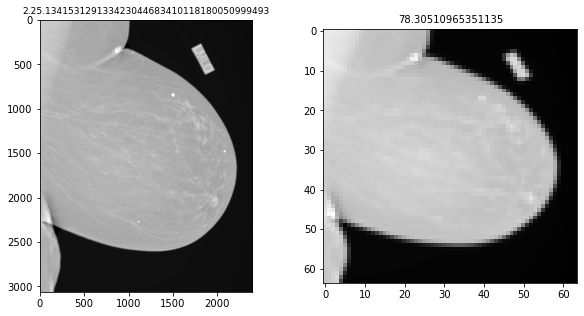

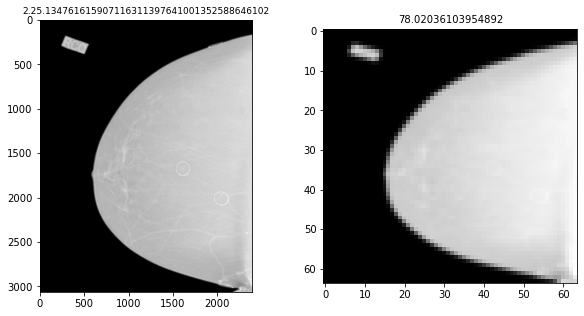

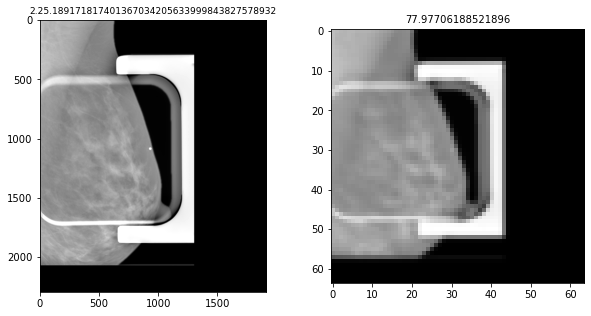

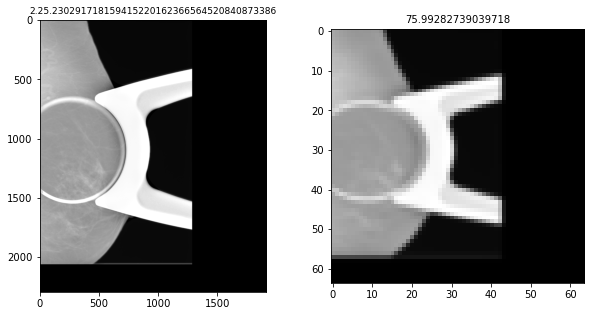

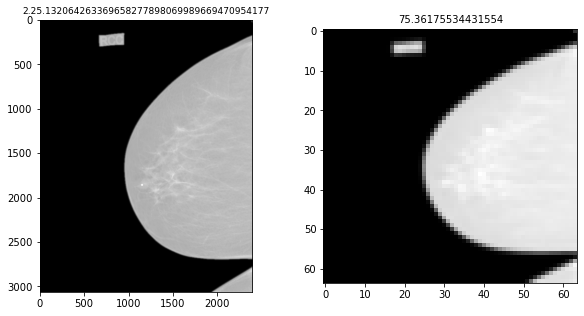

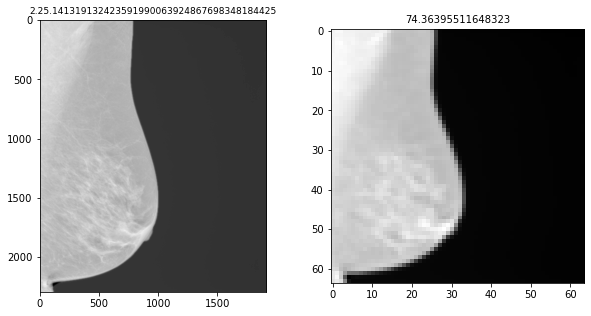

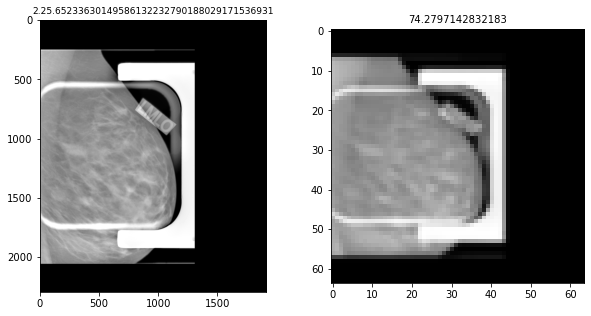

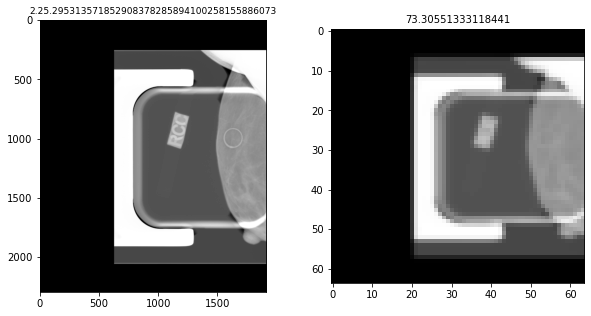

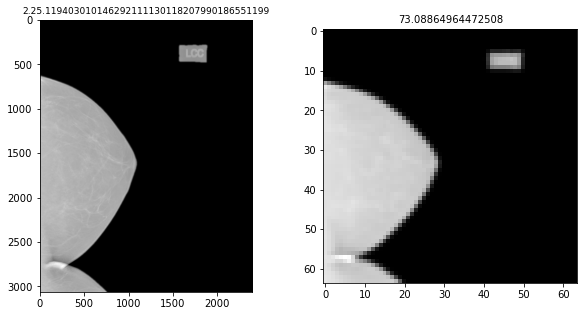

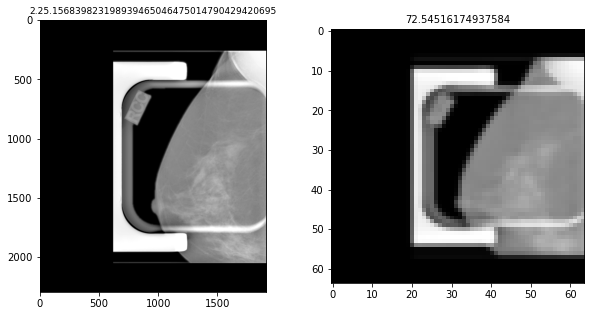

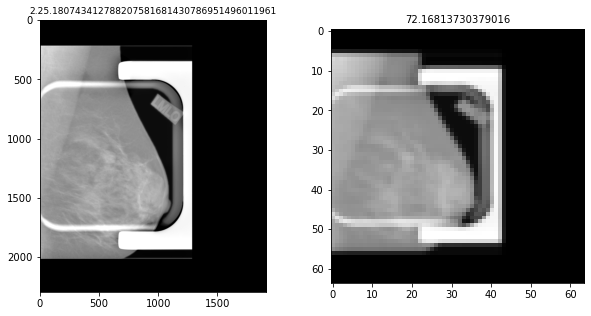

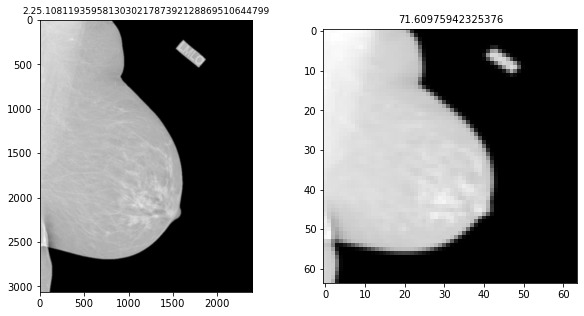

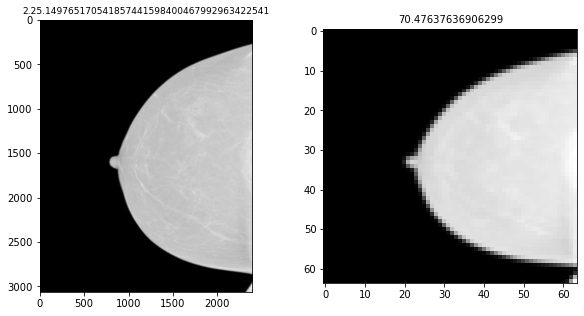

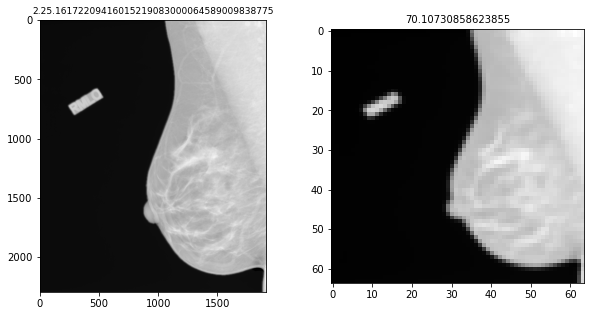

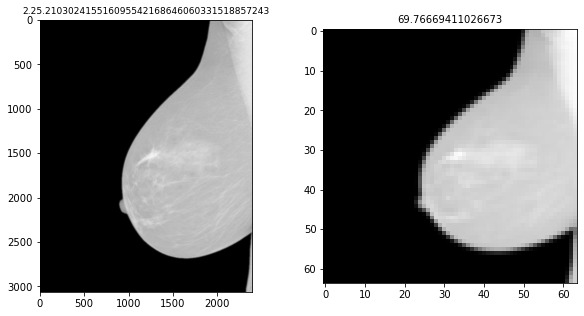

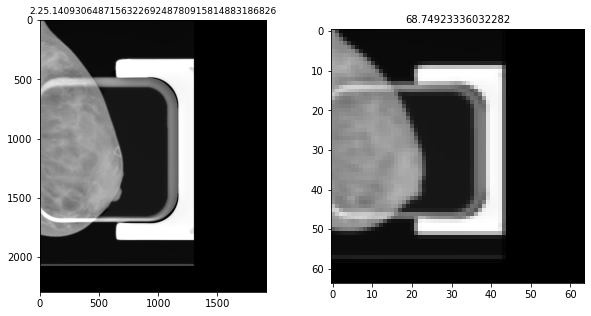

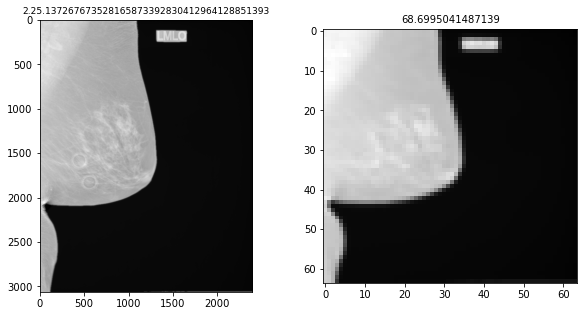

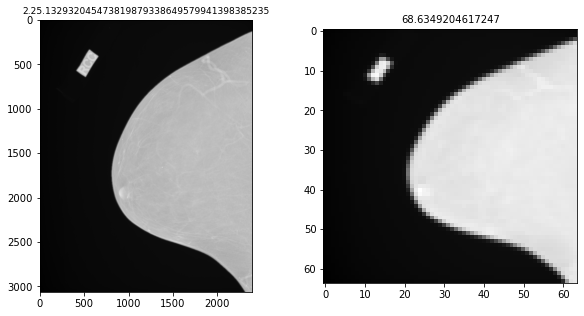

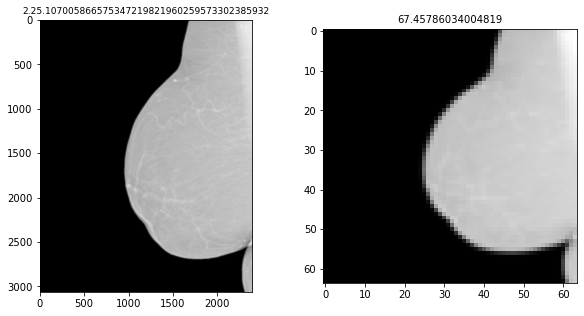

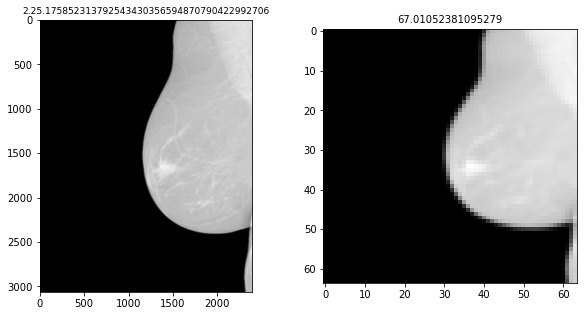

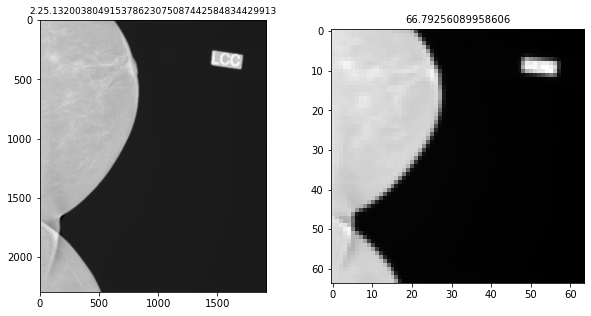

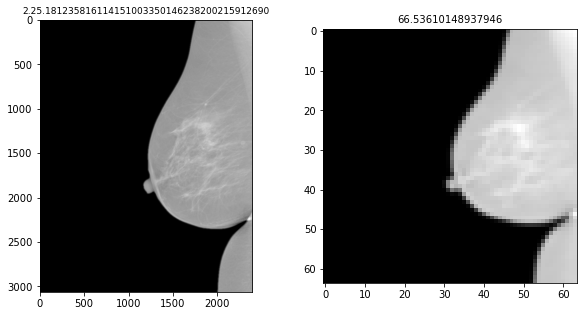

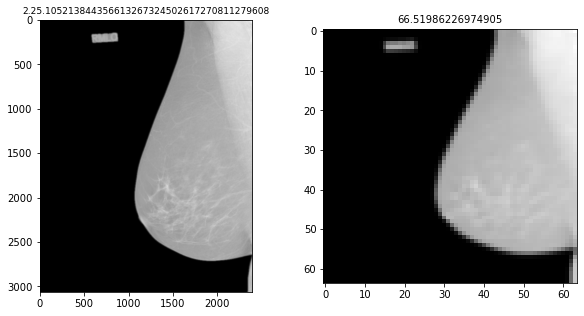

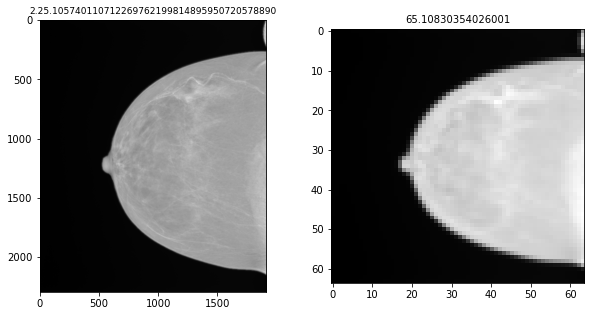

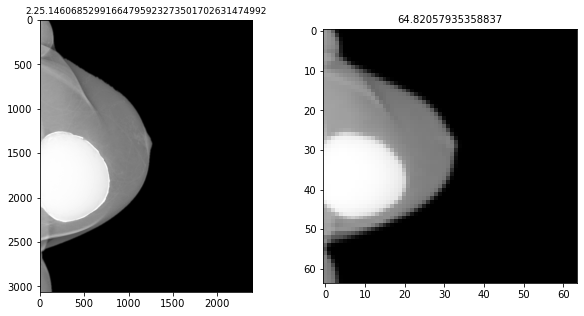

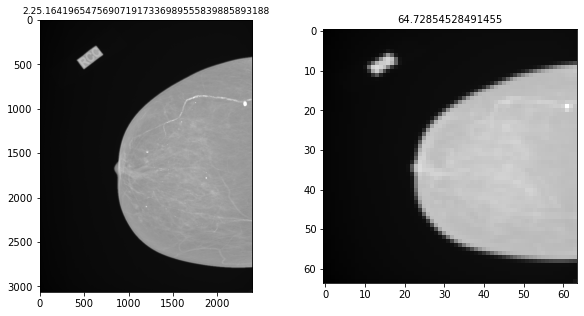

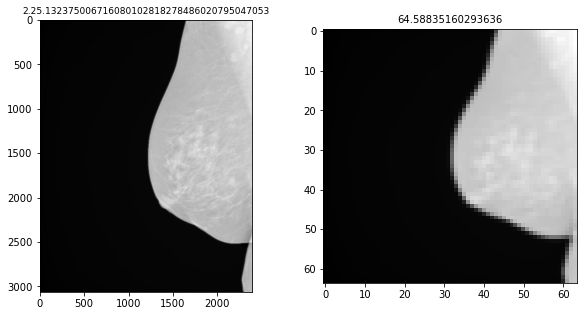

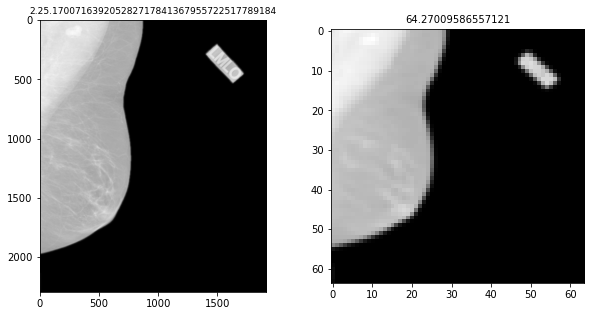

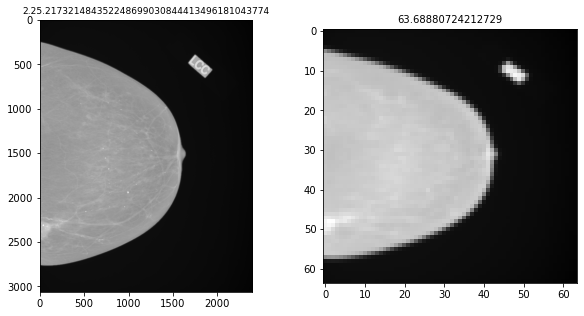

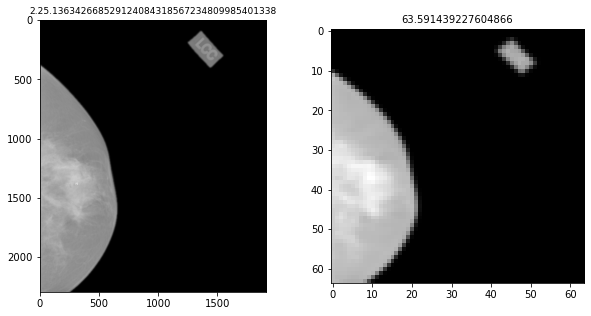

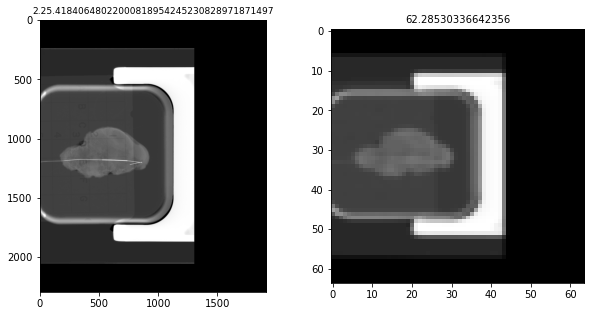

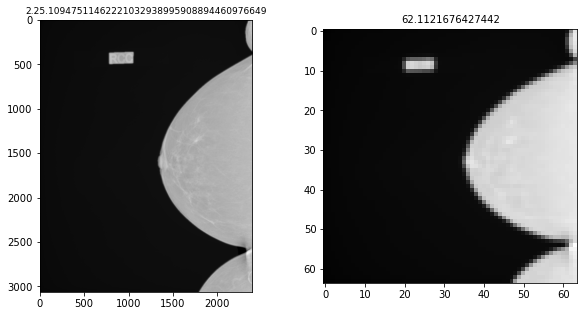

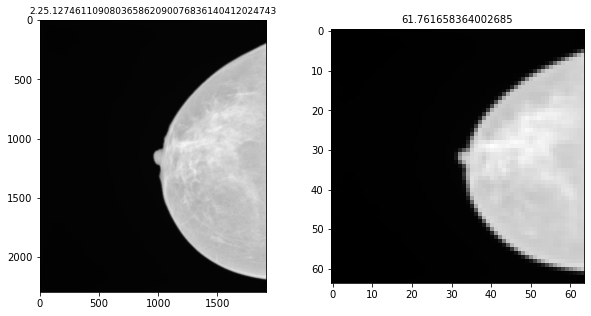

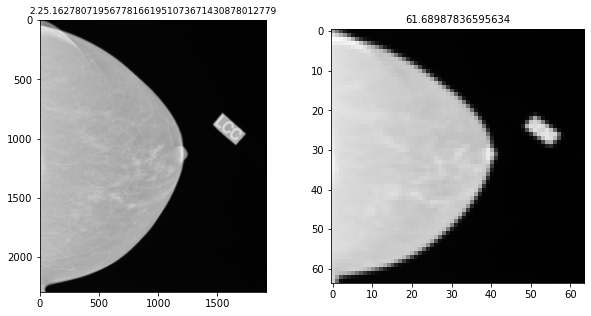

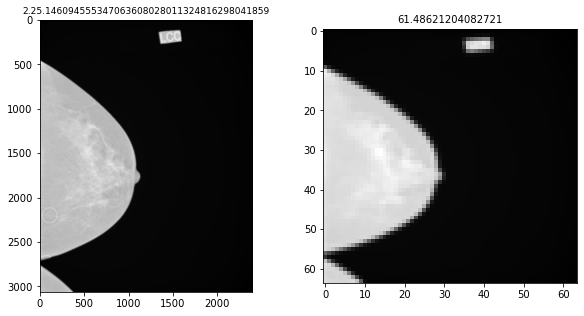

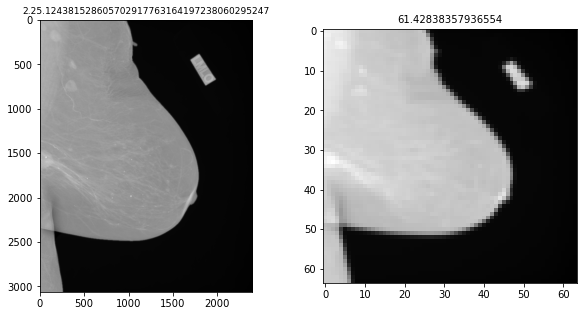

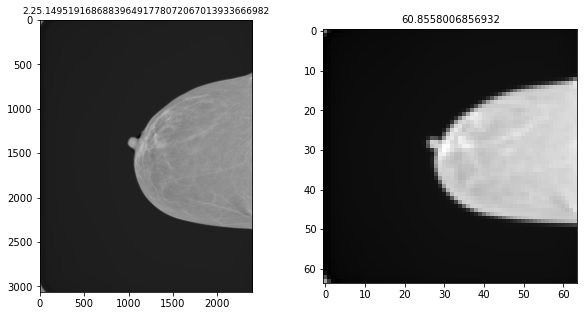

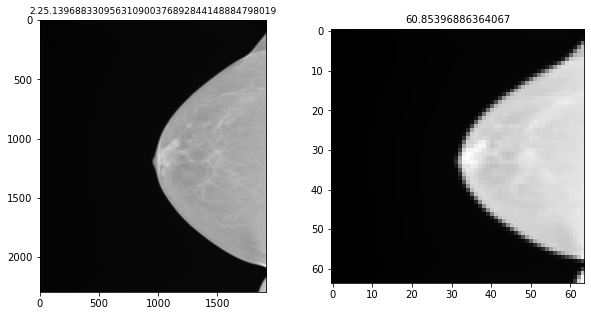

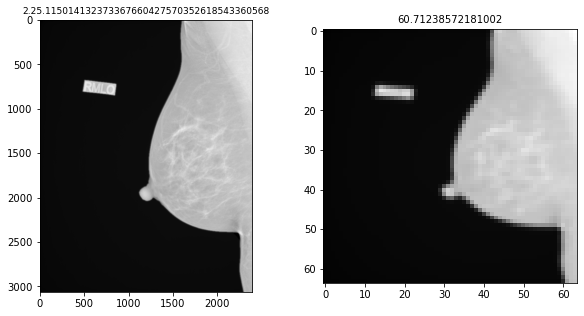

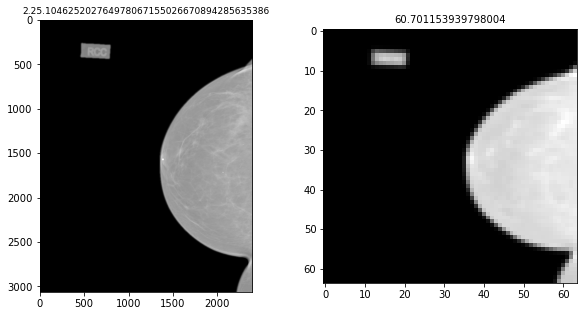

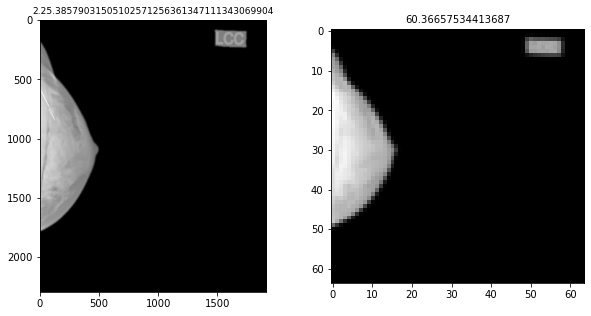

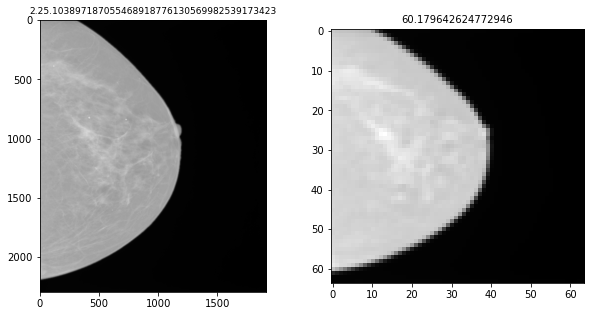

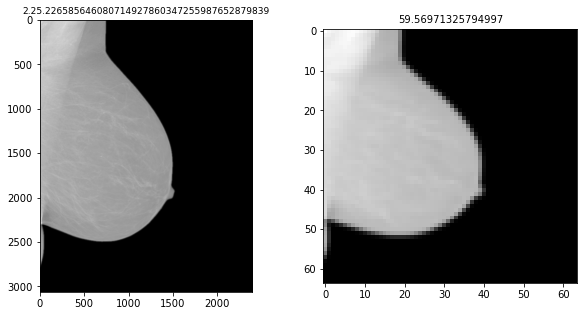

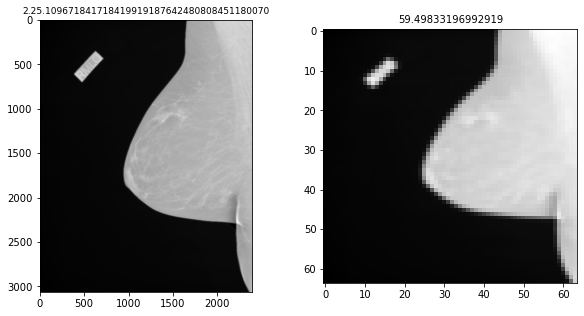

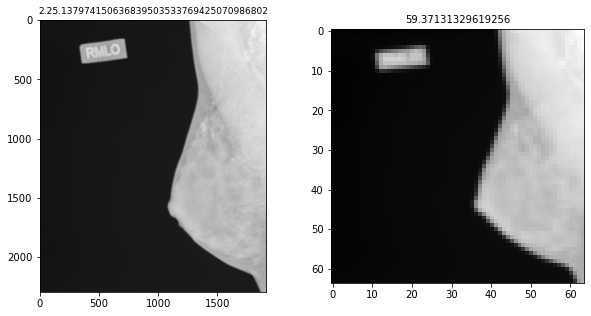

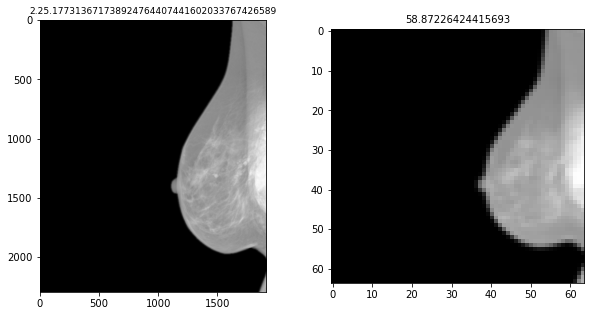

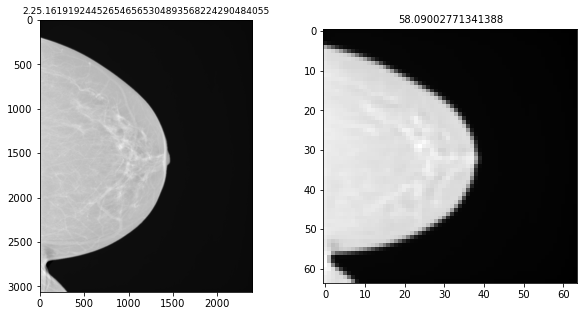

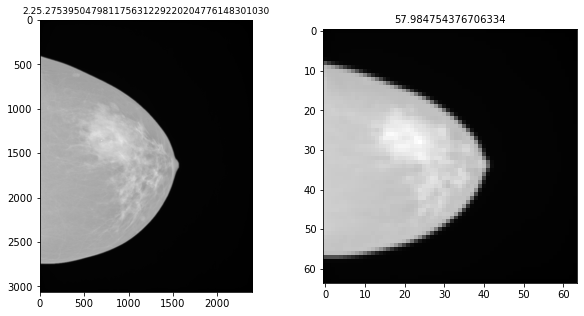

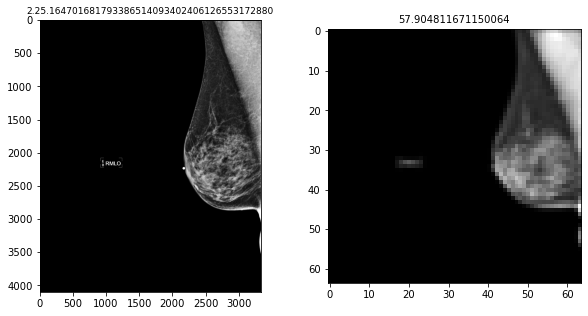

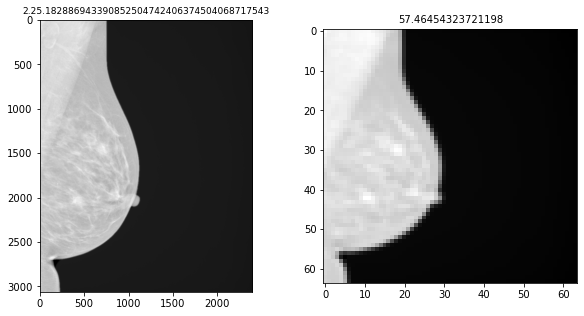

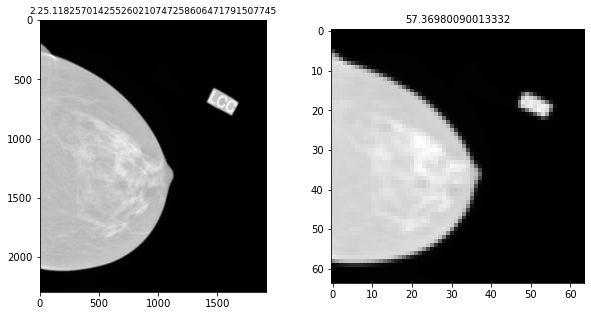

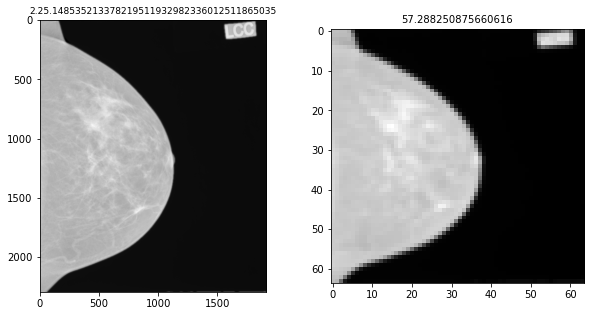

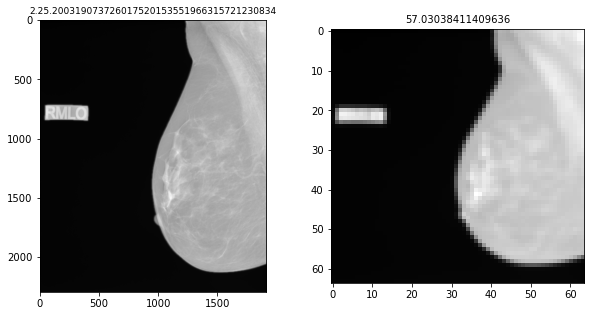

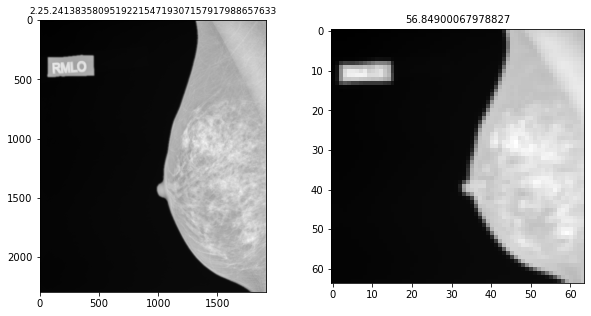

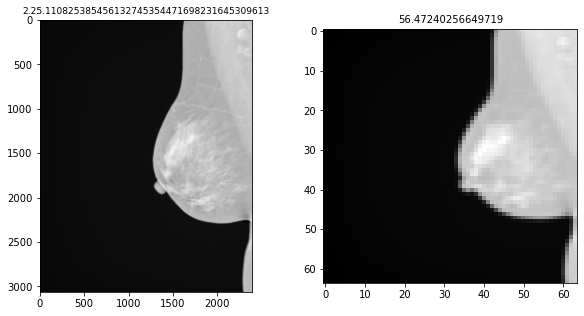

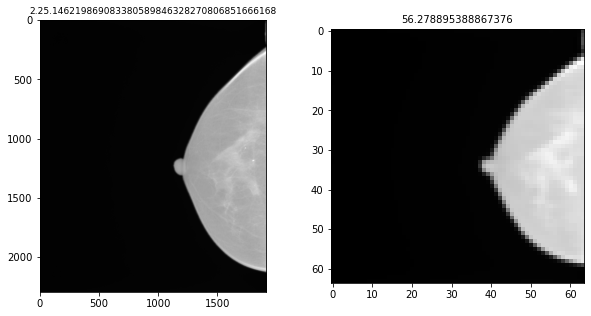

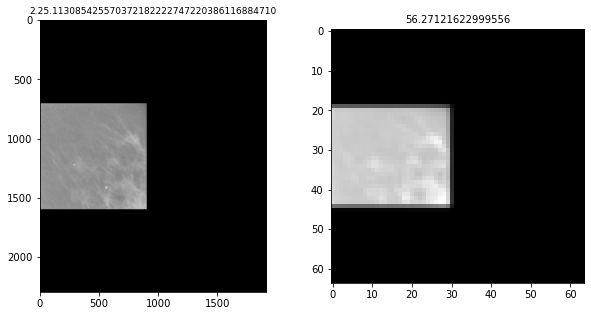

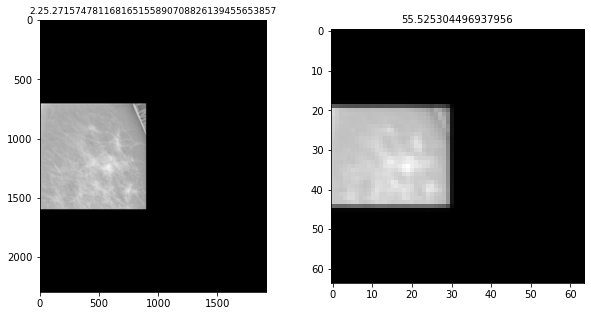

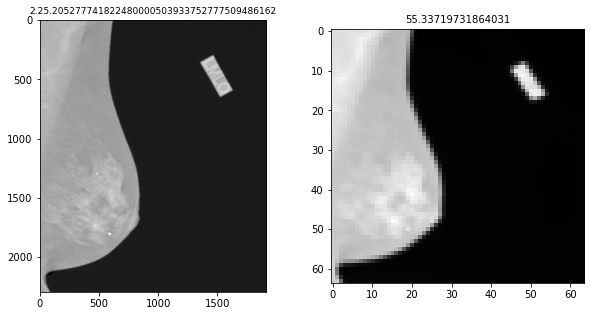

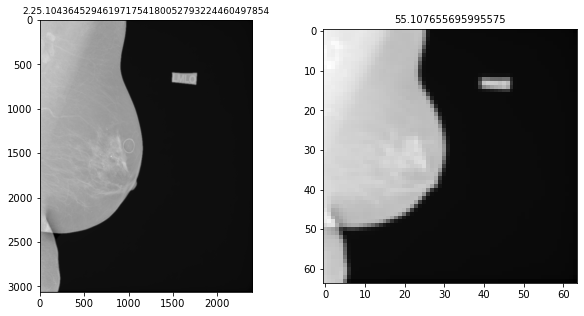

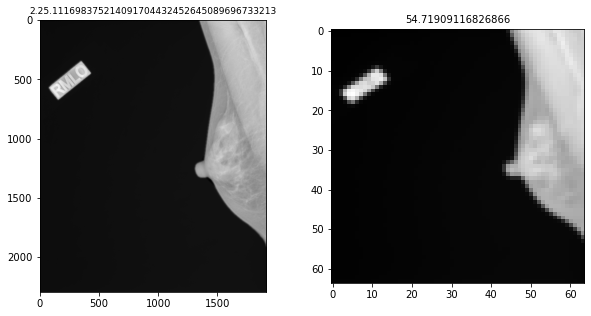

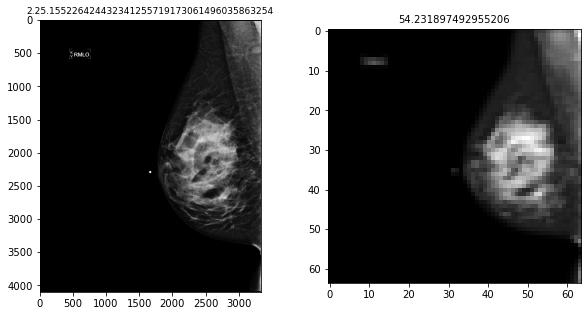

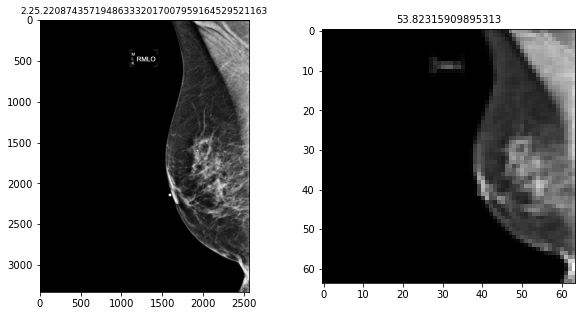

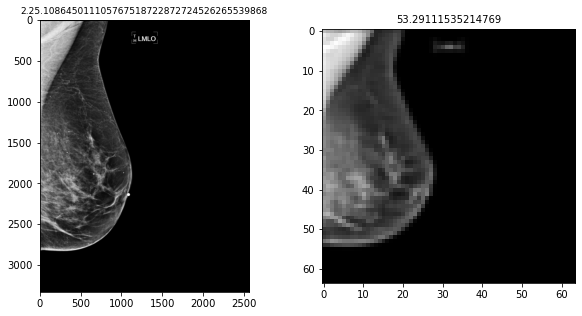

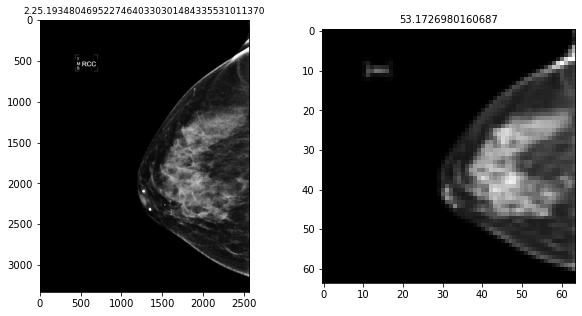

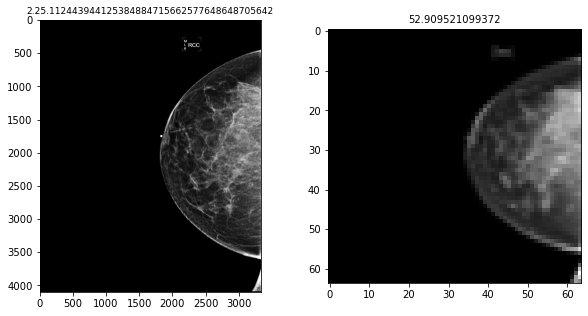

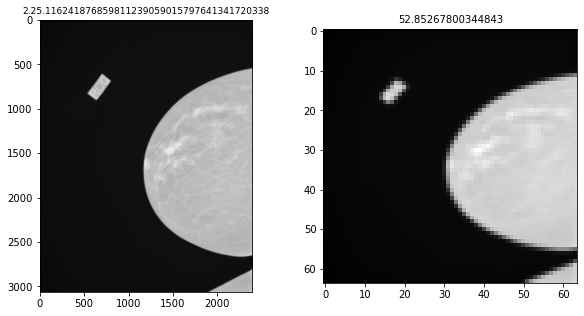

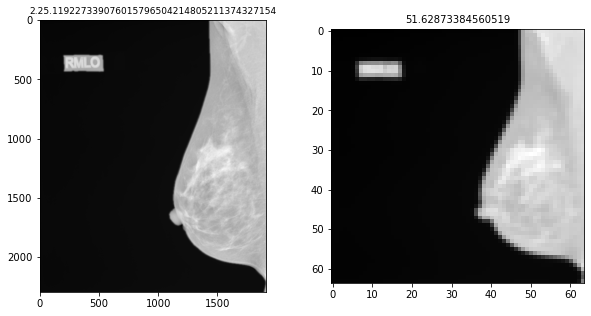

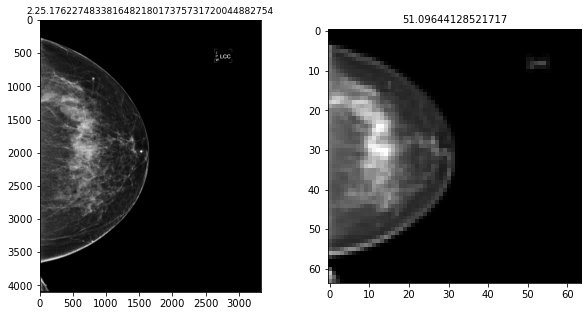

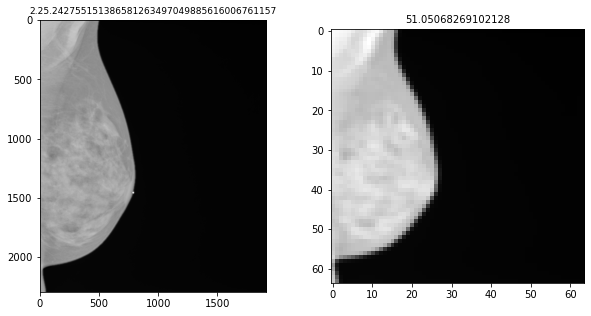

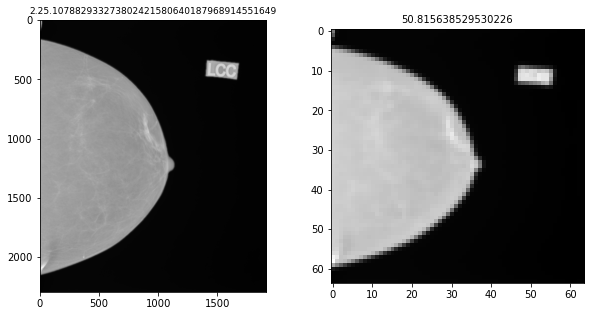

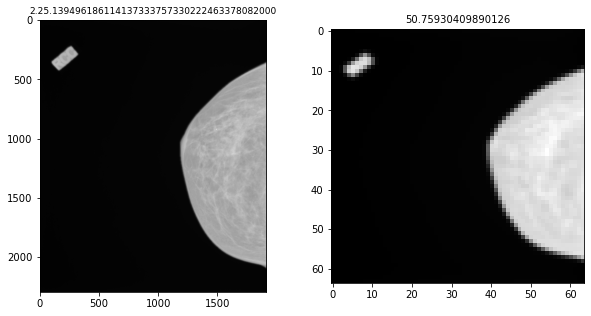

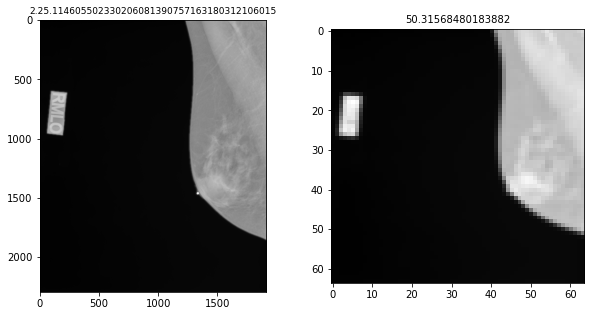

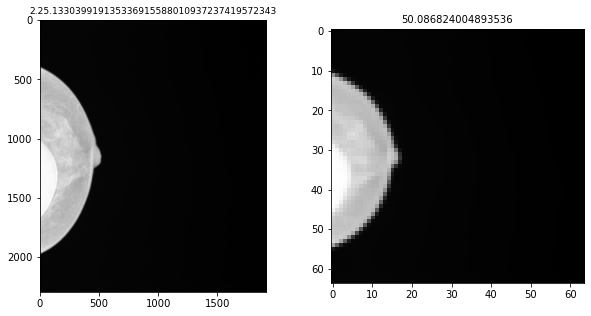

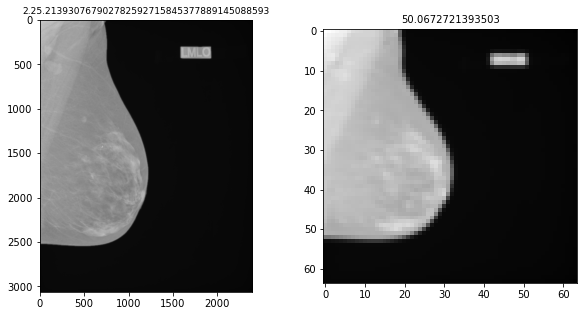

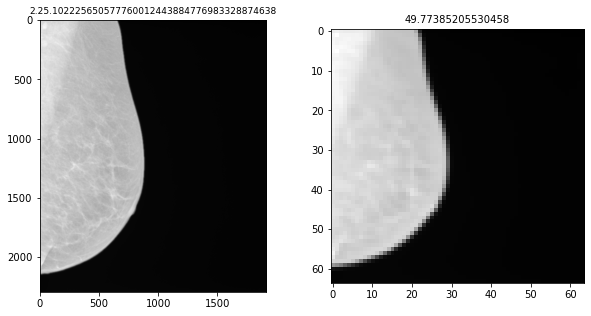

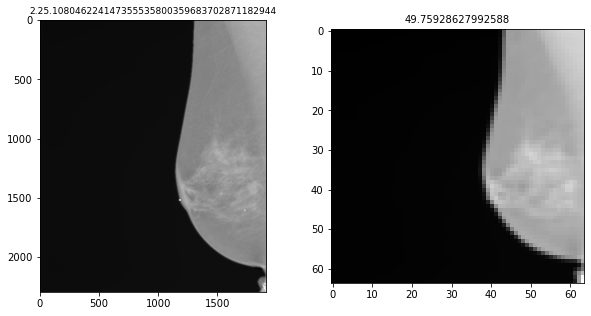

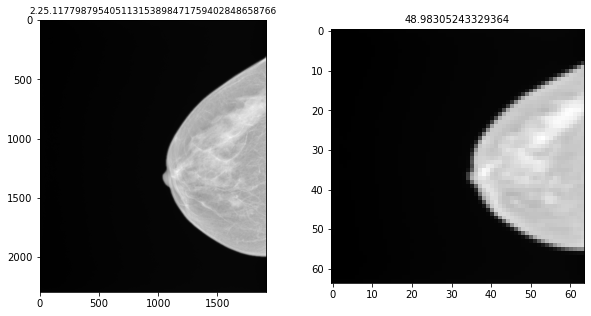

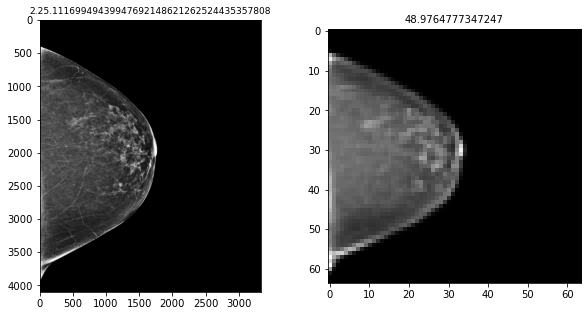

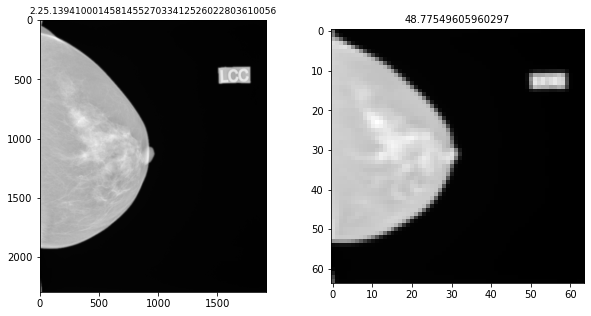

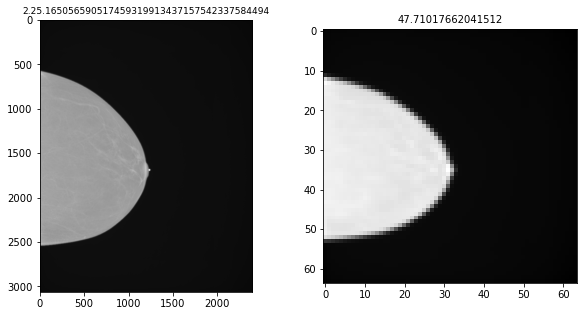

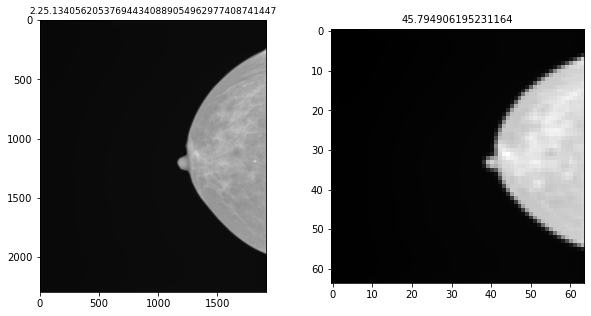

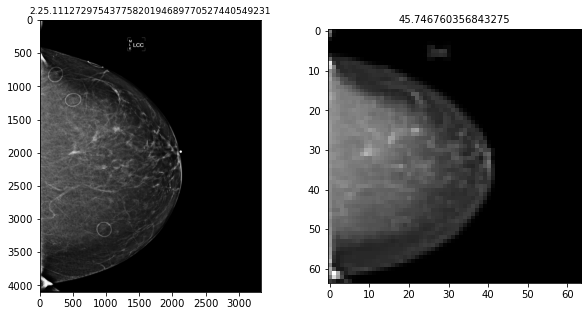

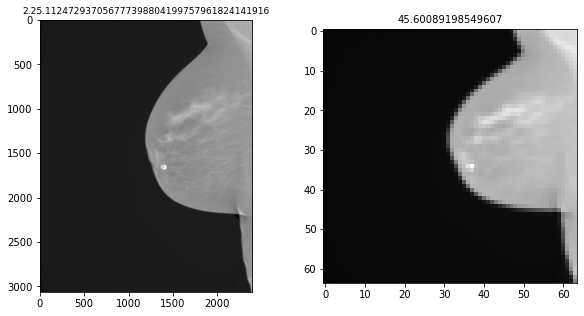

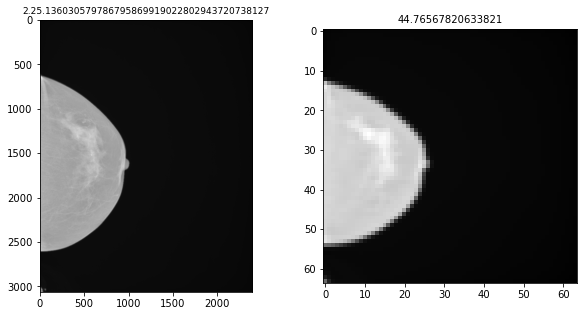

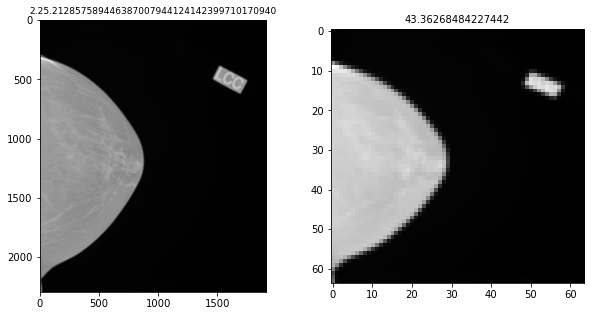

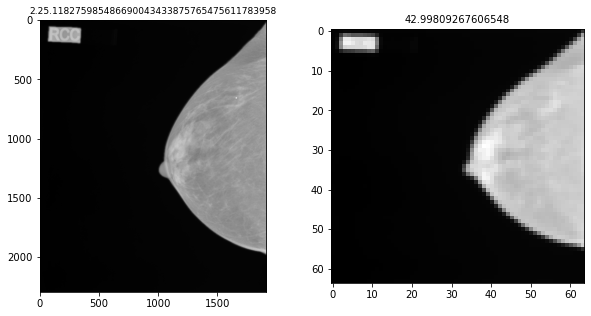

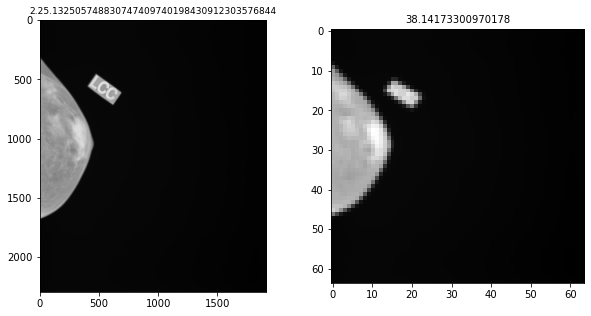

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='VAE')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])